# Computational Drug Discovery [Part 2] Exploratory Data Analysis.

This is the real life Data science project for my **Biological Data Science** Portifolio. Particularly, we will be  building a machine learning model using the ChEMBL bioactivity data.

In **Part 2**, we will be performing Description Calculation and Exploratory Data Analysis.

## Install conda and rdkit

using !pip to install rdkit because through conda we are getting import error

In [1]:
!pip install rdkit-pypi

## Load bioactivity data

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('acetylcholinesterase_03_bioactivity_data_curated.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,active
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,active
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,inactive
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,active
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,active
...,...,...,...,...
9381,NaN,NaN,NaN,inactive
9382,NaN,NaN,NaN,active
9383,NaN,NaN,NaN,active
9384,NaN,NaN,NaN,active


In [4]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [5]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')


In [6]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,bioactivity_class,canonical_smiles
0,CHEMBL133897,750.0,active,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1
1,CHEMBL336398,100.0,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1
2,CHEMBL131588,50000.0,inactive,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1
3,CHEMBL130628,300.0,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F
4,CHEMBL130478,800.0,active,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C
...,...,...,...,...
9381,NaN,NaN,inactive,nan
9382,NaN,NaN,active,nan
9383,NaN,NaN,active,nan
9384,NaN,NaN,active,nan


## Calculate Lipinski descriptiors
Christopher Lipinski, a scientist at Pfzier, came up with a set of rule_of_thumb for evaluating the **druglikeness** of compound. such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile.
lipinski analyzed all orally FDA-approved drugs in the formulation of what is to be known as the **Rule-of-five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:


*   Molecular weight < 500 dalton
*   Octanol-water partition coefficient(LogP) < 5
*   Hydrogen bond donors < 5
*   hydrogen bond acceptors < 10





### Import libraries

In [7]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

AttributeError: _ARRAY_API not found

### Calculate descriptors

In [8]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
      # Check if the element is a string before processing
        if isinstance(elem, str):
          mol=Chem.MolFromSmiles(elem)
          # Check if the molecule was successfully created
          moldata.append(mol)
          if mol is not None:
            moldata.append(mol)
          else:
            if verbose:
              print(f"Warning: Could not process SMILES string: {elem}")
        else:
          if verbose:
            print(f"Warning: Skipping invalid SMILES string: {elem}")

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [9]:
df_lipinski = lipinski(df.canonical_smiles)

### Combine DataFrames

let's take a look at the 2 DataFrames that will be combined.

In [10]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,312.325,2.8032,0.0,6.0
1,312.325,2.8032,0.0,6.0
2,376.913,4.5546,0.0,5.0
3,376.913,4.5546,0.0,5.0
4,426.851,5.3574,0.0,5.0
...,...,...,...,...
16251,401.474,2.9571,3.0,5.0
16252,387.447,2.6149,4.0,5.0
16253,387.447,2.6149,4.0,5.0
16254,388.431,3.0419,3.0,5.0


In [11]:
df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,active
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,active
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,inactive
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,active
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,active
...,...,...,...,...
9381,NaN,NaN,NaN,inactive
9382,NaN,NaN,NaN,active
9383,NaN,NaN,NaN,active
9384,NaN,NaN,NaN,active


Now, Let's combine the 2dataFrame

In [12]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [13]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,active,312.325,2.8032,0.0,6.0
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,active,312.325,2.8032,0.0,6.0
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,inactive,376.913,4.5546,0.0,5.0
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,active,376.913,4.5546,0.0,5.0
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,active,426.851,5.3574,0.0,5.0
...,...,...,...,...,...,...,...,...
16251,NaN,NaN,NaN,NaN,401.474,2.9571,3.0,5.0
16252,NaN,NaN,NaN,NaN,387.447,2.6149,4.0,5.0
16253,NaN,NaN,NaN,NaN,387.447,2.6149,4.0,5.0
16254,NaN,NaN,NaN,NaN,388.431,3.0419,3.0,5.0


### Convert IC50 to pIC50
To allow IC50 data to be more uniformly distributed, we will convert IC50 to the negative logarithmic scale which is essentially -log10(IC50).

This custom function pIC50 will accept a dataFrame as input and will:


*   Take the IC50 value from the ``standard_value`` coloumn and converts it from nMto M by multipying the value by 10$^{-9}$
*   Take the molar value and apply -log10
*   Delete the ``standard_value`` coloumn and create a new ``pIC50`` column



In [14]:
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1)

    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [15]:
df_combined.standard_value.describe()

,standard_value
count,8.130000e+03
mean,9.621809e+04
std,9.839719e+05
min,0.000000e+00
25%,1.000000e+02
50%,1.504500e+03
75%,1.240000e+04
max,5.000000e+07


In [16]:
-np.log10( (10**-9)* 100000000 )

np.float64(1.0)

In [17]:
-np.log10( (10**-9)* 10000000000 )

np.float64(-1.0)

We will first apply the norm_value() function so that the value in the standard_value coloumn is normalized.

In [18]:
#from re import X
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis=1)

    return x


In [19]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.8032,0.0,6.0,750.0
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,312.325,2.8032,0.0,6.0,100.0
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,376.913,4.5546,0.0,5.0,50000.0
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,376.913,4.5546,0.0,5.0,300.0
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,426.851,5.3574,0.0,5.0,800.0
...,...,...,...,...,...,...,...,...
16251,NaN,NaN,NaN,401.474,2.9571,3.0,5.0,NaN
16252,NaN,NaN,NaN,387.447,2.6149,4.0,5.0,NaN
16253,NaN,NaN,NaN,387.447,2.6149,4.0,5.0,NaN
16254,NaN,NaN,NaN,388.431,3.0419,3.0,5.0,NaN


In [20]:
df_norm.standard_value_norm.describe()

,standard_value_norm
count,8.130000e+03
mean,9.621809e+04
std,9.839719e+05
min,0.000000e+00
25%,1.000000e+02
50%,1.504500e+03
75%,1.240000e+04
max,5.000000e+07


In [21]:
df_final = pIC50(df_norm)
df_final

/tmp/ipython-input-14-4018684485.py:8: RuntimeWarning: divide by zero encountered in log10
  pIC50.append(-np.log10(molar))


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.8032,0.0,6.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,312.325,2.8032,0.0,6.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,376.913,4.5546,0.0,5.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,376.913,4.5546,0.0,5.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,426.851,5.3574,0.0,5.0,6.096910
...,...,...,...,...,...,...,...,...
16251,NaN,NaN,NaN,401.474,2.9571,3.0,5.0,NaN
16252,NaN,NaN,NaN,387.447,2.6149,4.0,5.0,NaN
16253,NaN,NaN,NaN,387.447,2.6149,4.0,5.0,NaN
16254,NaN,NaN,NaN,388.431,3.0419,3.0,5.0,NaN


In [22]:
df_final.pIC50.describe()

,pIC50
count,8130.000000
mean,inf
std,NaN
min,1.301030
25%,4.906578
50%,5.822610
75%,7.000000
max,inf


### Removing the 'intermediate' bioactivity class
here, we will be removing the intermediate class from our Data Set.

In [23]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.8032,0.0,6.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,312.325,2.8032,0.0,6.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,376.913,4.5546,0.0,5.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,376.913,4.5546,0.0,5.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,426.851,5.3574,0.0,5.0,6.096910
...,...,...,...,...,...,...,...,...
16251,NaN,NaN,NaN,401.474,2.9571,3.0,5.0,NaN
16252,NaN,NaN,NaN,387.447,2.6149,4.0,5.0,NaN
16253,NaN,NaN,NaN,387.447,2.6149,4.0,5.0,NaN
16254,NaN,NaN,NaN,388.431,3.0419,3.0,5.0,NaN


In [24]:
df_2class.to_csv('acetylcholinesterase_bioactivity_data_2class_pIC50.csv', index=False)

# Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors

### Import library

In [25]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt


### Frequency plot of the 2 bioactivity classes

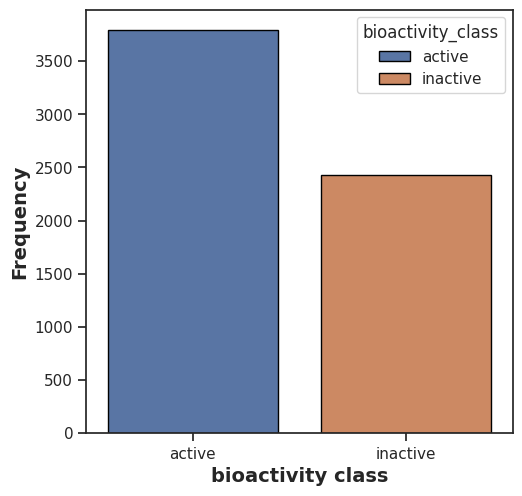

In [26]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, hue='bioactivity_class', edgecolor='black')

plt.xlabel('bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')




### Scatter  plot of MW versus LogP
It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by  the scatter plot of MW vs LogP.

### Find the NaN or infinite values and removing them.
###### Counting NaNs

In [27]:
import numpy as np

# Check for non-finite values
print(df_2class[['MW', 'LogP']].isnull().sum())  # Count NaNs
print(np.isfinite(df_2class[['MW', 'LogP']]).sum())  # Count finite values

MW      0
LogP    0
dtype: int64
MW      14348
LogP    14348
dtype: int64


###### removing rows with non-finite value.

In [28]:
df_clean = df_2class[np.isfinite(df_2class['MW']) & np.isfinite(df_2class['LogP'])]

/tmp/ipython-input-40-4014409359.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)


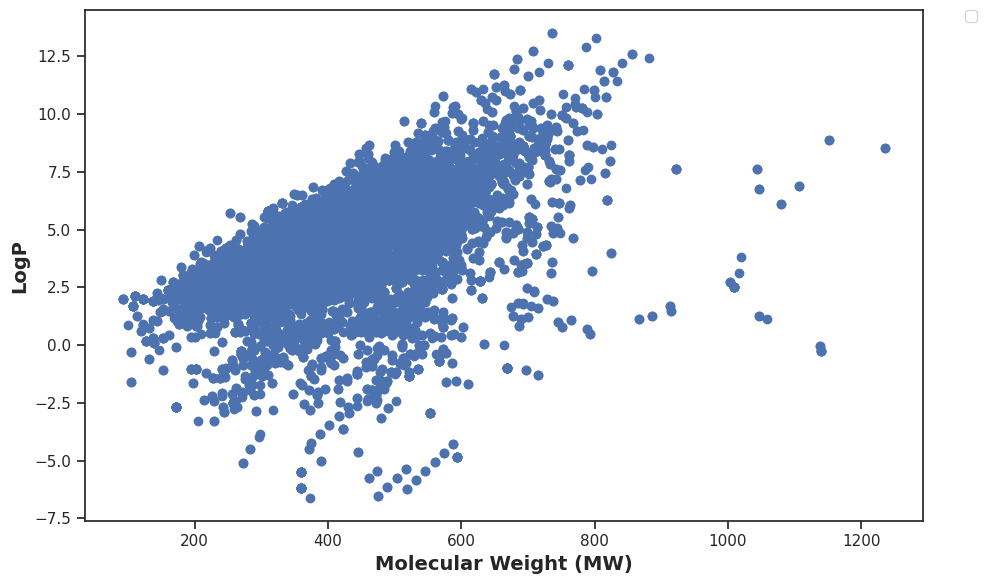

In [40]:
plt.figure(figsize=(10, 6))

plt.scatter(df_clean['MW'], df_clean['LogP'])
plt.xlabel('Molecular Weight (MW)', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

plt.tight_layout()
plt.savefig('plot_MW_vs_LogP.pdf')  # Should now work!




## Box plot

#### Mann-Whitney function for statistcal analysis

In [43]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

 #seed the random number generator
  seed(1)

 #actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df['bioactivity_class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df['bioactivity_class'] == 'inactive']
  inactive = inactive[descriptor]

  # compare samples
  stat, p = mannwhitneyu(active, inactive)
  print('Statistics=%.3f, p=%.3f' % (stat, p))

  # interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

### pIC50 value

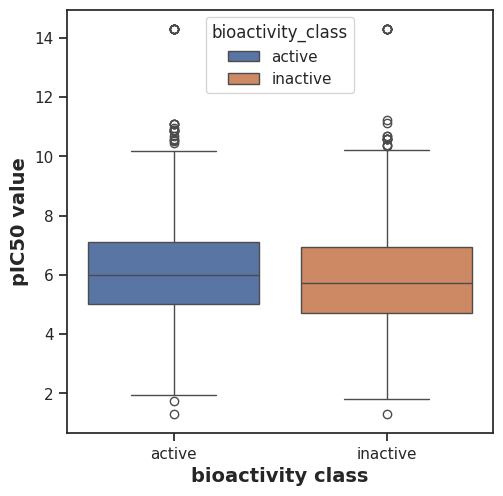

In [44]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class, hue = 'bioactivity_class')

plt.xlabel('bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_pic50.pdf')

##### statistical analysis | Mann-Whitney U Test

In [45]:
mannwhitney('pIC50')

Statistics=nan, p=nan


,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,NaN,NaN,0.05,Different distribution (reject H0)


#### MW

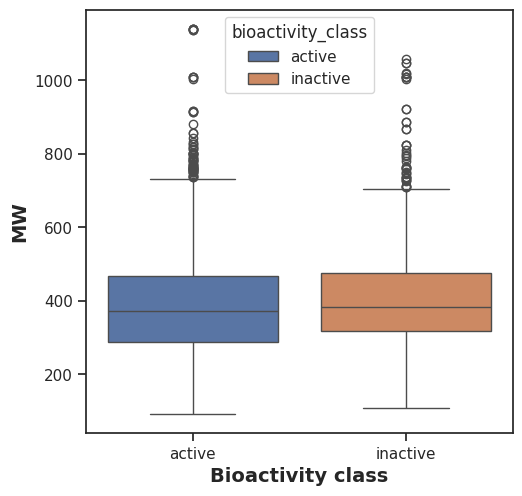

In [46]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class, hue = 'bioactivity_class')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

##### statistical analysis | Mann-Whitney U Test

In [47]:
mannwhitney('MW')

Statistics=4305455.500, p=0.000


,Descriptor,Statistics,p,alpha,Interpretation
0,MW,4305455.5,0.000014,0.05,Different distribution (reject H0)


#### LogP

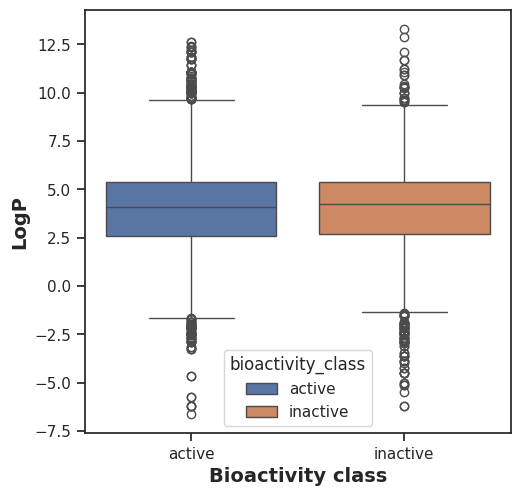

In [48]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class, hue = 'bioactivity_class')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

##### statistical analysis | Mann-Whitney U Test

In [49]:
mannwhitney('LogP')

Statistics=4501392.500, p=0.130


,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,4501392.5,0.130462,0.05,Same distribution (fail to reject H0)


#### NumHDonors

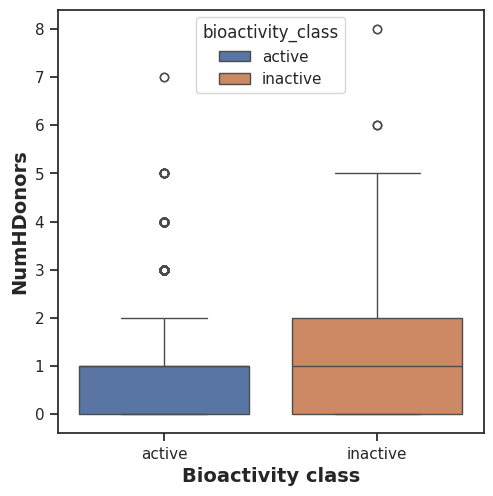

In [50]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class, hue = 'bioactivity_class')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

##### statistical analysis | Mann-Whitney U Test

In [51]:
mannwhitney('NumHDonors')

Statistics=4609253.500, p=0.959


,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,4609253.5,0.9589,0.05,Same distribution (fail to reject H0)


#### NumHAcceptors

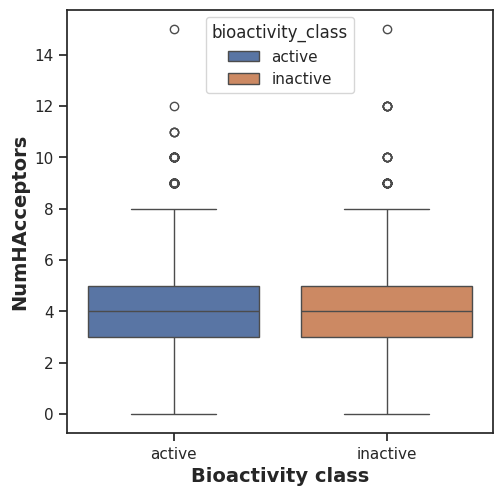

In [52]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class, hue = 'bioactivity_class')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

##### statistical analysis | Mann-Whitney U Test

In [53]:
mannwhitney('NumHAcceptors')

Statistics=4393496.500, p=0.002


,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,4393496.5,0.001759,0.05,Different distribution (reject H0)


#### Interpretation of Statistical Results

##### **Box Plots**

###### **pIC50**

taking a look at pIC50 value, the **actives** and **inactives** displayed ***statistically significant difference**, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactive``, corresponding to ``pIC50 > 6 = Active and pIC50 <5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's  descriptors**

All of the 4 Lipinski's descriptors exhibited ***statisticaaly significant difference*** between the **actives** and **inactives**.

## **Zip files**

In [54]:
! zip -r results.zip . -i *.csv *.pdf

  adding: mannwhitneyu_LogP.csv (deflated 9%)
  adding: plot_MW_vs_LogP.pdf (deflated 5%)
  adding: mannwhitneyu_MW.csv (deflated 8%)
  adding: plot_NumHAcceptors.pdf (deflated 37%)
  adding: plot_pic50.pdf (deflated 36%)
  adding: mannwhitneyu_pIC50.csv (deflated 9%)
  adding: plot_MW.pdf (deflated 37%)
  adding: acetylcholinesterase_bioactivity_data_2class_pIC50.csv (deflated 83%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
  adding: acetylcholinesterase_03_bioactivity_data_curated.csv (deflated 83%)
  adding: plot_NumHDonors.pdf (deflated 36%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 10%)
  adding: plot_LogP.pdf (deflated 36%)
  adding: plot_bioactivity_class.pdf (deflated 37%)
